In [1]:
from TensorHelpers import *
from QFT import *
from MPS import *

import numpy as np
from qiskit.visualization import array_to_latex


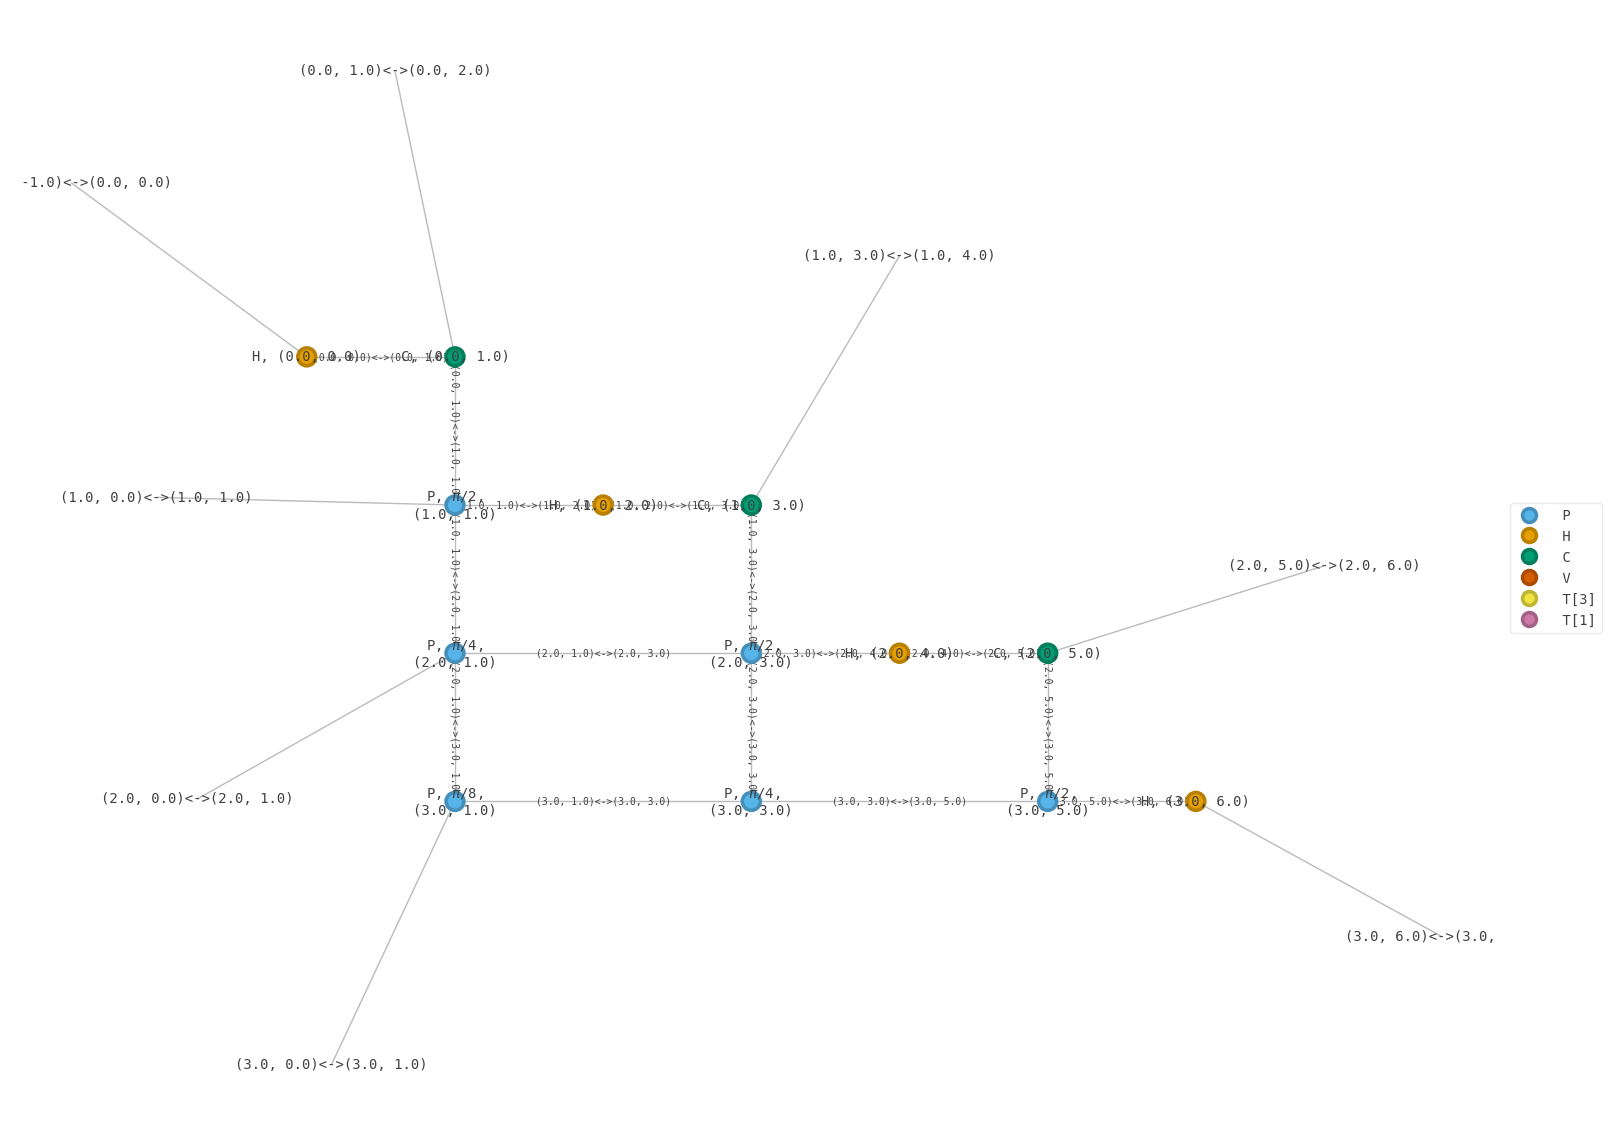

Tensor shape: (2, 2, 2)
Tensor: Tensor(shape=(2, 2, 2), inds=('(0.0, 1.0)<->(0.0, 2.0)', '(0.0, 1.0)<->(1.0, 1.0)', '(0.0, -1.0)<->(0.0, 0.0)'), tags=oset(['(0.0, 0.0)', 'U[0]']), backend='numpy', dtype='complex128')
Tensor Data:
 [[[ 0.70710678+0.j  0.        +0.j]
  [ 0.        +0.j  0.70710678+0.j]]

 [[ 0.70710678+0.j  0.        +0.j]
  [ 0.        +0.j -0.70710678+0.j]]]
Tensor shape: (2, 2, 2, 4)
Tensor: Tensor(shape=(2, 2, 2, 4), inds=('_26cccdAAAAC', '(1.0, 3.0)<->(1.0, 4.0)', '(1.0, 0.0)<->(1.0, 1.0)', '(0.0, 1.0)<->(1.0, 1.0)'), tags=oset(['(1.0, 0.0)', 'U[1]']), backend='numpy', dtype='complex128')
Tensor Data:
 [[[[-3.19129650e-01+1.52021870e-17j -4.32362579e-01+1.81191990e-01j
     1.22935971e-16+3.84910725e-01j -1.69682652e-01+3.79455045e-02j]
   [-1.47298958e-01+3.55611141e-01j -7.20121714e-04-1.73872209e-01j
    -2.94837352e-01-1.22125630e-01j -8.05554478e-02+4.61821130e-01j]]

  [[-3.19129650e-01+1.52021870e-17j -4.32362579e-01+1.81191990e-01j
     9.58908408e-17+3.849

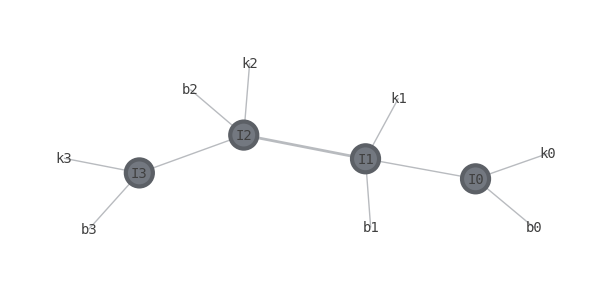

In [2]:
QFT_MPO = QFT(4)
QFT_MPO.create_circuit()
QFT_MPO.draw()
mpo = QFT_MPO.create_MPO(max_bond_dim=-1, cutoff=1e-15, verbose=False, reverse=True)

mpo.draw()

# Comparing MPS

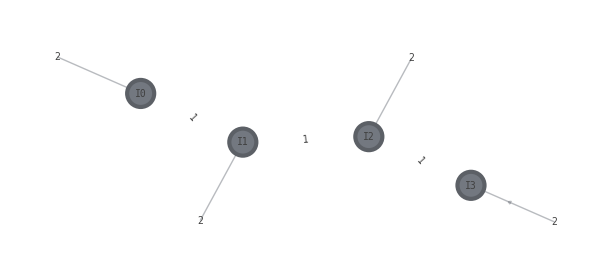

(1, 2)
[[-1.41421356+0.j        -1.30656296-0.5411961j]]

(1, 2, 1)
[[[0.70710678+0.j ]
  [0.5       +0.5j]]]

(1, 2, 1)
[[[0.70710678+0.j        ]
  [0.        +0.70710678j]]]

(2, 1)
[[-0.70710678-5.21087597e-17j]
 [ 0.70710678-8.29203642e-17j]]



In [25]:
QFT_mps = MPS(4)


mps = QFT_mps.create_MPS(
    [lambda x: np.exp(2j*np.pi*x)/2], 
    0, 
    1.0, 
    max_bond=4,
    cutoff=1e-15,
    reverse=True
)

mps.draw(show_inds='bond-size')
for t in mps.tensors_sorted():
    print(t.shape)
    print(t.data, end='\n\n')

In [26]:
python_mps_res = mps.to_dense().reshape((16,))
print(python_mps_res.shape)
print(python_mps_res)

(16,)
[ 5.00000000e-01+3.68464574e-17j -5.00000000e-01+5.86335519e-17j
 -3.68464574e-17+5.00000000e-01j -5.86335519e-17-5.00000000e-01j
  3.53553391e-01+3.53553391e-01j -3.53553391e-01-3.53553391e-01j
 -3.53553391e-01+3.53553391e-01j  3.53553391e-01-3.53553391e-01j
  4.61939766e-01+1.91341716e-01j -4.61939766e-01-1.91341716e-01j
 -1.91341716e-01+4.61939766e-01j  1.91341716e-01-4.61939766e-01j
  1.91341716e-01+4.61939766e-01j -1.91341716e-01-4.61939766e-01j
 -4.61939766e-01+1.91341716e-01j  4.61939766e-01-1.91341716e-01j]


In [27]:
julia_mps_res = np.array([0.4999999999999996 + 2.9314579421307735e-17j, 0.4619397662556433 + 0.19134171618254486j, 0.3535533905932737 + 0.3535533905932735j, 0.19134171618254503 + 0.46193976625564337j, -4.0491443498878406e-17 + 0.49999999999999944j, -0.1913417161825448 + 0.46193976625564315j, -0.3535533905932734 + 0.35355339059327356j, -0.46193976625564326 + 0.19134171618254495j, -0.49999999999999967 + 6.568865448039731e-17j, -0.46193976625564337 - 0.1913417161825448j, -0.3535533905932738 - 0.3535533905932735j, -0.19134171618254514 - 0.4619397662556434j, -5.451179040282661e-17 - 0.4999999999999995j, 0.19134171618254475 - 0.4619397662556432j, 0.3535533905932734 - 0.3535533905932737j, 0.46193976625564326 - 0.19134171618254509j])

julia_mps_res = julia_mps_res.reshape((16,))
print(julia_mps_res.shape)
print(julia_mps_res)

(16,)
[ 5.00000000e-01+2.93145794e-17j  4.61939766e-01+1.91341716e-01j
  3.53553391e-01+3.53553391e-01j  1.91341716e-01+4.61939766e-01j
 -4.04914435e-17+5.00000000e-01j -1.91341716e-01+4.61939766e-01j
 -3.53553391e-01+3.53553391e-01j -4.61939766e-01+1.91341716e-01j
 -5.00000000e-01+6.56886545e-17j -4.61939766e-01-1.91341716e-01j
 -3.53553391e-01-3.53553391e-01j -1.91341716e-01-4.61939766e-01j
 -5.45117904e-17-5.00000000e-01j  1.91341716e-01-4.61939766e-01j
  3.53553391e-01-3.53553391e-01j  4.61939766e-01-1.91341716e-01j]


## Comparing norms of both

In [28]:
np.linalg.norm(julia_mps_res - python_mps_res)

2.782105042503941

In [29]:
res = mps.contract()
print(res.data)

[[[[ 5.00000000e-01+3.68464574e-17j  4.61939766e-01+1.91341716e-01j]
   [ 3.53553391e-01+3.53553391e-01j  1.91341716e-01+4.61939766e-01j]]

  [[-3.68464574e-17+5.00000000e-01j -1.91341716e-01+4.61939766e-01j]
   [-3.53553391e-01+3.53553391e-01j -4.61939766e-01+1.91341716e-01j]]]


 [[[-5.00000000e-01+5.86335519e-17j -4.61939766e-01-1.91341716e-01j]
   [-3.53553391e-01-3.53553391e-01j -1.91341716e-01-4.61939766e-01j]]

  [[-5.86335519e-17-5.00000000e-01j  1.91341716e-01-4.61939766e-01j]
   [ 3.53553391e-01-3.53553391e-01j  4.61939766e-01-1.91341716e-01j]]]]


# Comparing MPS applied to MPO

## MPO applied to MPS

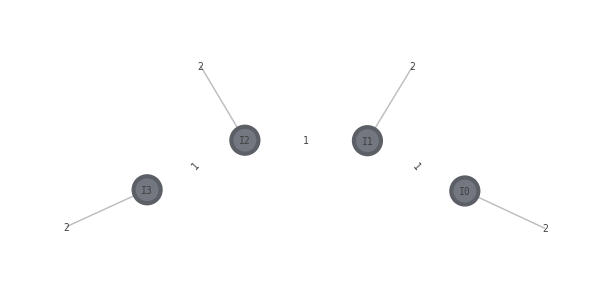

In [30]:
mpo_mps_res = mpo.apply(mps, compress=True)
mpo_mps_res.draw(show_inds='bond-size')

In [31]:
for t in mpo_mps_res.tensors:
    print(t.shape)
    print(t.data, end='\n\n')

(1, 2)
[[6.85827661e-01-1.87873373e+00j 2.22044605e-16-1.66533454e-16j]]

(1, 1, 2)
[[[-1.00000000e+00+0.00000000e+00j -1.12953754e-16-3.19324017e-16j]]]

(1, 1, 2)
[[[-1.00000000e+00+0.00000000e+00j -2.20427155e-16-1.54295437e-16j]]]

(1, 2)
[[-1.17741378e-16+0.j          3.42913830e-01+0.93936686j]]



## Comparing MPS applied to MPO results

In [32]:
python_mpo_mps_res = mpo_mps_res.to_dense().reshape(16,)
print(python_mpo_mps_res)

[-8.07502938e-17+2.21204698e-16j  2.00000000e+00-5.55111512e-16j
 -5.19304329e-32+3.63001203e-32j  4.40854309e-16+3.08590873e-16j
 -7.97570214e-32-7.99607133e-34j  2.25907508e-16+6.38648033e-16j
 -1.74572376e-47-1.24823996e-47j -4.87443279e-32+1.75631866e-31j
 -2.61438377e-32+1.96078783e-32j  2.32578174e-16+1.51474720e-16j
 -8.78821791e-48+2.88233967e-49j  2.78946871e-32+6.92748924e-32j
 -9.21431107e-48-6.13357182e-48j -2.20989381e-32+9.13774349e-32j
 -1.08470223e-63-2.77373193e-63j -1.89703272e-47+1.67323027e-47j]


In [33]:
array_to_latex(python_mpo_mps_res, precision=10, max_size=16)

<IPython.core.display.Latex object>

In [34]:
julia_mpo_mps_res = np.array([-1.2089532313012745e-16 - 6.645481227536771e-17j, 1.9999999999999991 - 3.7036561010638967e-16j, 9.160052455049549e-17 + 8.991686656580361e-17j, 1.278658900135974e-16 - 2.228709330511187e-16j, 3.86992366597388e-17 + 3.762859628324072e-17j, -5.759671079966052e-17 + 2.831885184557626e-16j, -3.1629381478567244e-18 + 2.4592637467772196e-17j, 5.551115123125783e-17 - 5.0724164335633977e-17j, -9.8730206676118e-18 + 3.068970237933349e-17j, -4.996003610813204e-16 + 3.114990738811579e-17j, -1.6343331984014062e-17 + 4.085147723193564e-17j, 9.417871491143391e-17 + 5.468482310517048e-17j, -5.84452779949624e-17 + 3.762859628324072e-17j, -3.392608985801931e-16 + 5.632762299473506e-18j, -3.260217174817751e-17 - 4.8465961325485806e-18j, 1.1102230246251565e-16 + 1.965565461264408e-16j])
array_to_latex(julia_mpo_mps_res, precision=10, max_size=16)

<IPython.core.display.Latex object>

In [24]:
np.linalg.norm(python_mpo_mps_res - julia_mpo_mps_res)

1.648445798853067e-15